In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-price-optimization-case-study/retail_price.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('/kaggle/input/retail-price-optimization-case-study/retail_price.csv')
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

To perform data analysis on this dataset, we'll take a step-by-step approach. The primary goal is to uncover insights that can help optimize Fashionista's pricing strategy, maximize revenue, and improve competitiveness. We'll use various types of analysis, focusing on key factors like pricing, product performance, seasonality, and competition.

Let's break down the analysis plan and potential visualizations:

1. Data Cleaning & Preprocessing
Before diving into the analysis, we need to ensure that the dataset is in a suitable format. This includes:

Check for Missing Data: Since all columns have non-null counts of 676, there’s no immediate issue with missing data. However, it's worth double-checking for outliers or inconsistencies.

Convert Date/Time Data: The column month_year should be converted to a datetime object for easier time-based analysis.

In [5]:
# Convert month_year to datetime
df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')

2. Exploratory Data Analysis (EDA)
We'll start by gaining a high-level understanding of the data.

2.1. Product Pricing Analysis
We want to understand the distribution of prices (unit price) and how they are related to quantity sold and revenue.

Visualizations:


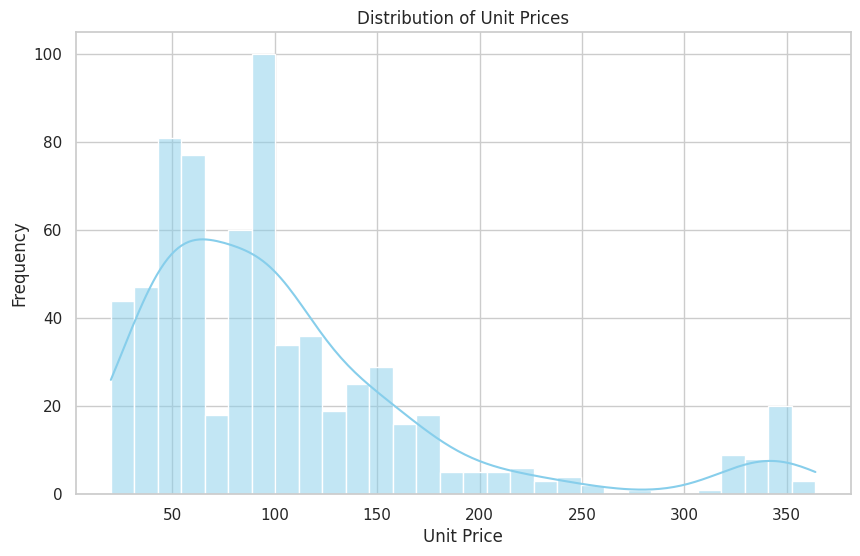

In [6]:

## Histogram of Unit Prices: To see the price distribution of products.

# Set up Seaborn style
sns.set(style="whitegrid")

# 1. Distribution of Unit Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['unit_price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

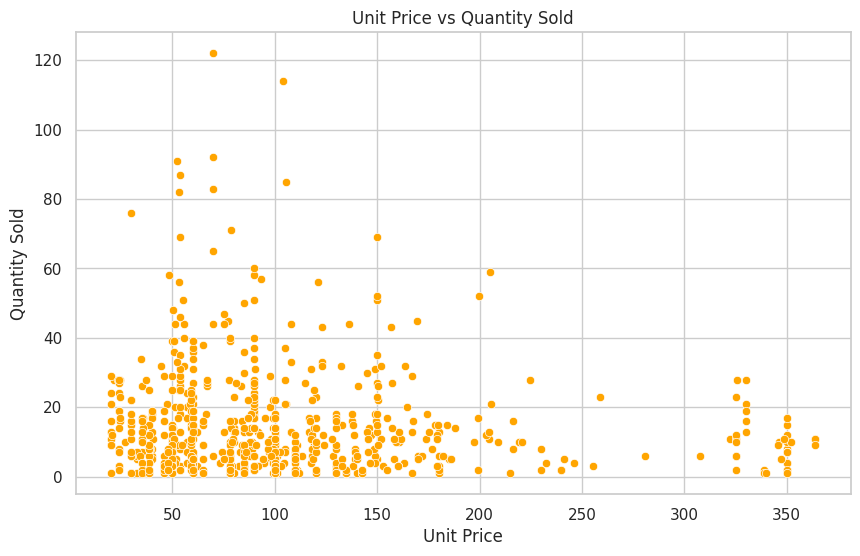

In [7]:
## Scatter Plot of unit_price vs qty to identify any pricing vs. sales trends.
# Set up Seaborn style
sns.set(style="whitegrid")



# 2. Scatter Plot: Unit Price vs Quantity Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unit_price', y='qty', data=df, color='orange')
plt.title('Unit Price vs Quantity Sold')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.show()

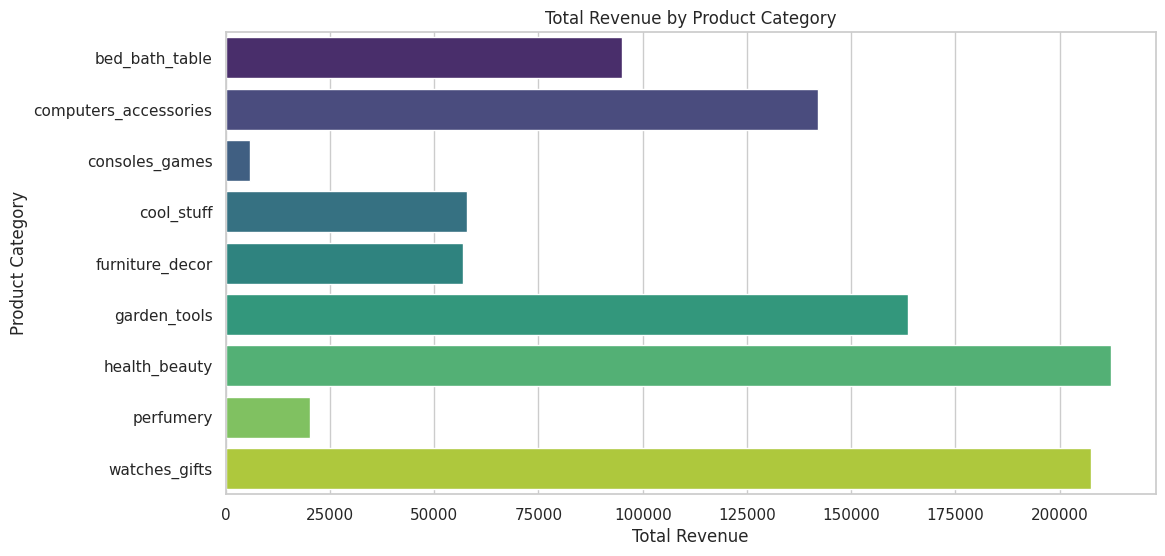

In [8]:
##Box Plot of unit_price across different product_category_name to 
##observe pricing differences across categories.

# 3. Total Revenue by Product Category
revenue_by_category = df.groupby('product_category_name')['total_price'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='total_price', y='product_category_name', data=revenue_by_category, palette='viridis')
plt.title('Total Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()

2.2. Revenue by Category and Time
How does revenue (total price) vary by product category and over time (monthly)?

Visualizations:

Bar Chart of total revenue by product_category_name.
Line Plot showing the trend of total_price over time (month_year).

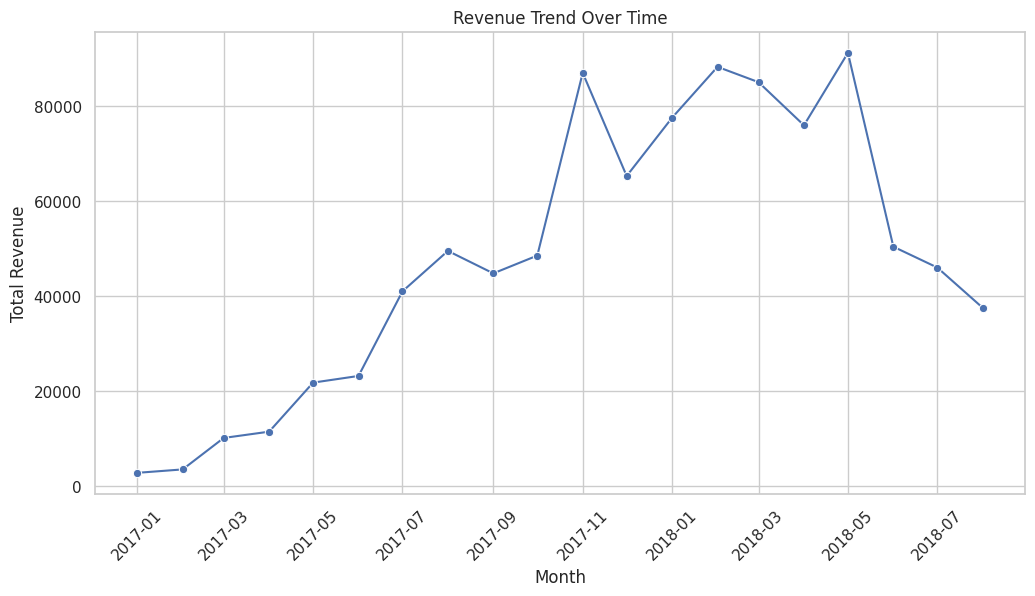

In [9]:
# 4. Revenue Trend Over Time (Monthly)
monthly_revenue = df.groupby('month_year')['total_price'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='total_price', data=monthly_revenue, marker='o')
plt.title('Revenue Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

3. Competition Analysis
Analyze how competitors' prices and other factors (comp_1, comp_2, comp_3) affect Fashionista's pricing and sales.

Visualizations:

Scatter Plot of unit_price vs competitor prices (comp_1, comp_2, comp_3).



.

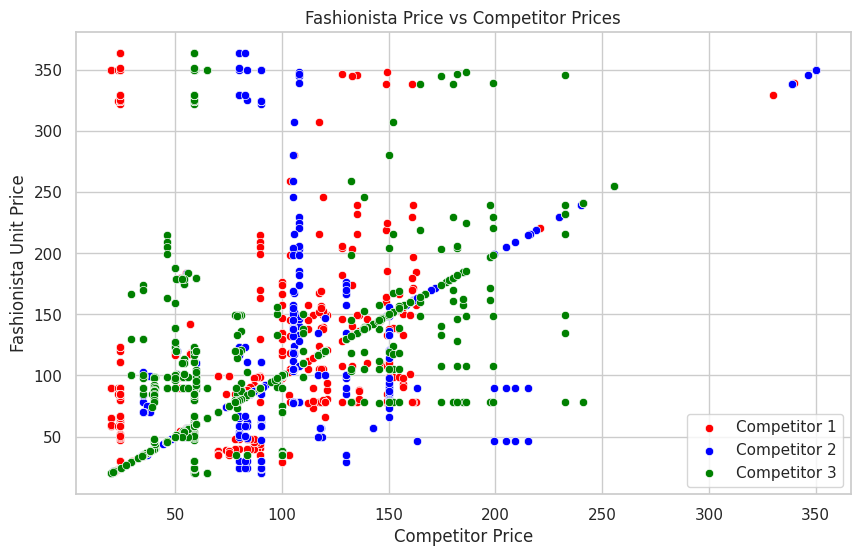

In [10]:
# 5. Competitor Price Comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comp_1', y='unit_price', data=df, label='Competitor 1', color='red')
sns.scatterplot(x='comp_2', y='unit_price', data=df, label='Competitor 2', color='blue')
sns.scatterplot(x='comp_3', y='unit_price', data=df, label='Competitor 3', color='green')
plt.title('Fashionista Price vs Competitor Prices')
plt.xlabel('Competitor Price')
plt.ylabel('Fashionista Unit Price')
plt.legend()
plt.show()

4. Seasonality and Monthly Trends
How do sales, pricing, and volume change over months?

Visualizations:

Line Plot for total_price and qty across months to examine seasonal patterns.
Heatmap of month_year vs. product_category_name showing how different categories perform over time.
4.1. Sales Performance by Year and Month
Bar Plot of qty by month and year to identify high and low sales periods.

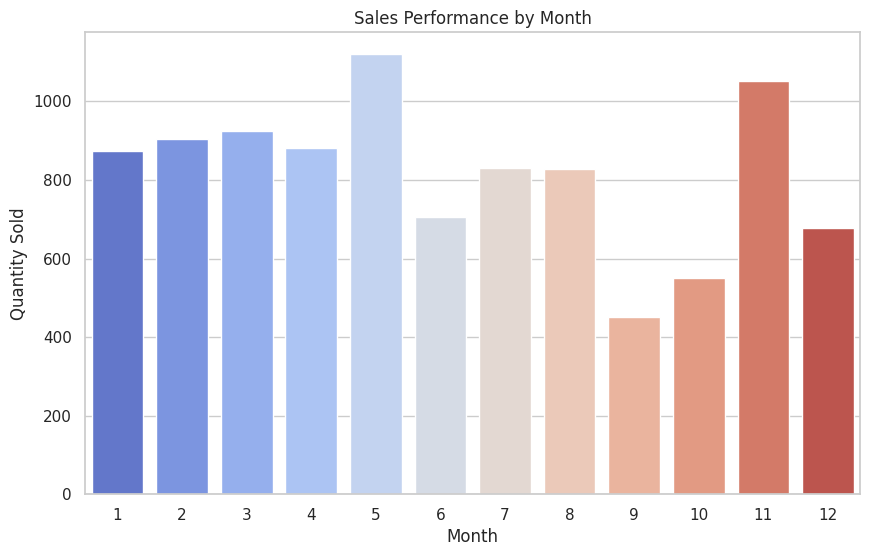

In [11]:
# 6. Sales Performance by Month
monthly_sales = df.groupby('month')['qty'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='qty', data=monthly_sales, palette='coolwarm')
plt.title('Sales Performance by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.show()


Correlation Heatmap to identify relationships between Fashionista's prices and competitor prices.
Correlation Matrix to assess relationships between unit_price, qty, and other features

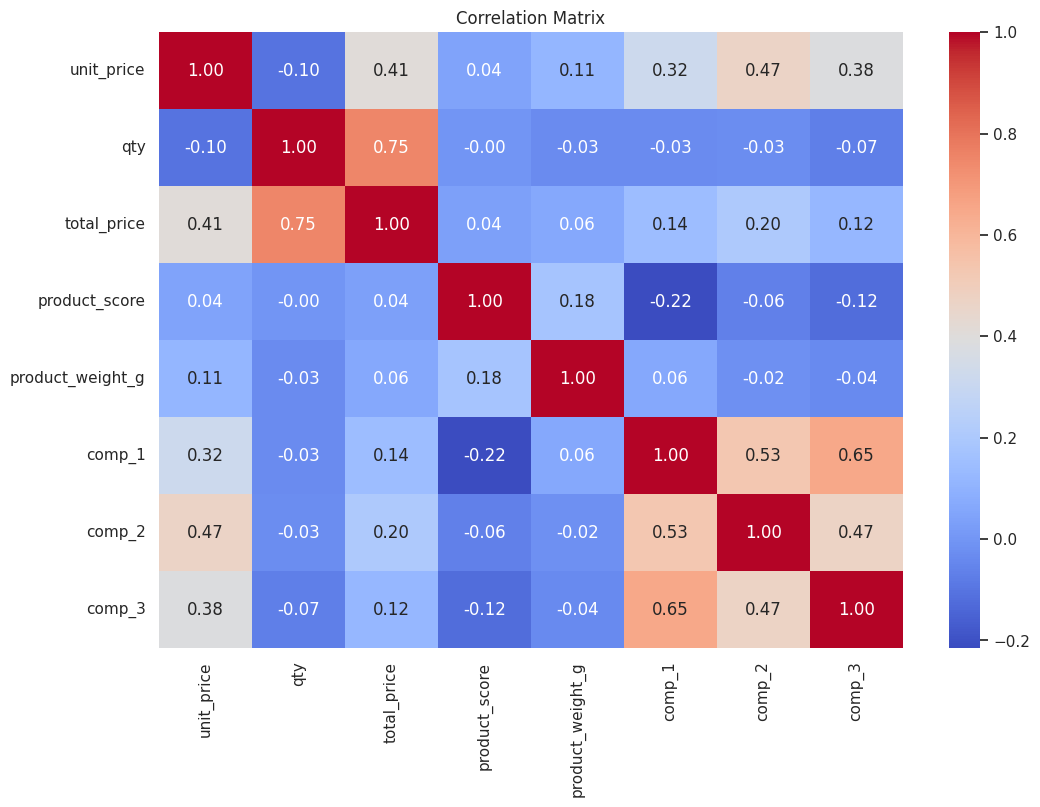

In [12]:
# 7. Correlation Heatmap
correlation_matrix = df[['unit_price', 'qty', 'total_price', 'product_score', 'product_weight_g', 'comp_1', 'comp_2', 'comp_3']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

5. Product-Specific Insights
Identify specific product characteristics that drive higher sales.

Visualizations:

Treemap to visualize top-performing product categories or individual products by sales.
Bubble Chart with product_score and product_weight_g to visualize relationships between product score and sales

In [13]:
import plotly.express as px

# Aggregate data by product category
category_sales = df.groupby('product_category_name')['total_price'].sum().reset_index()

# Create a Treemap to visualize top-performing product categories by sales
fig = px.treemap(category_sales, 
                 path=['product_category_name'], 
                 values='total_price',
                 title='Top-Performing Product Categories by Sales')
fig.show()

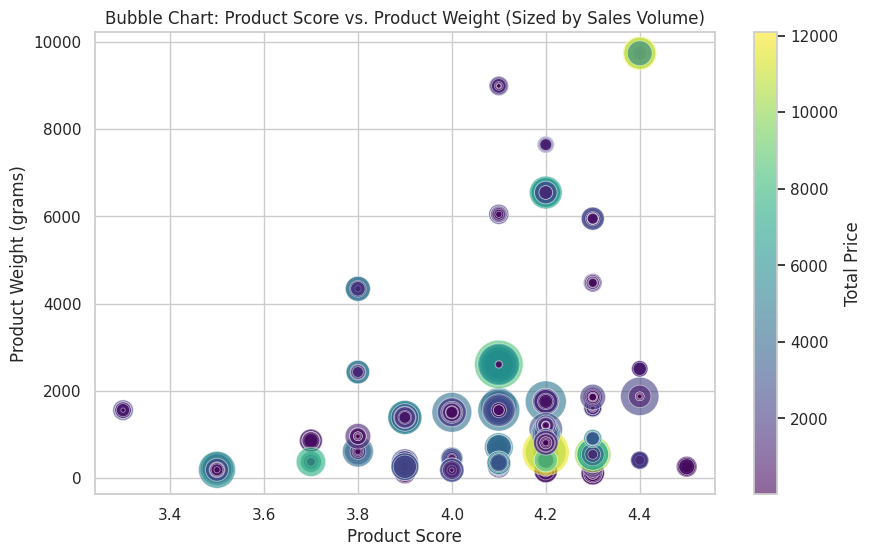

In [14]:
# Create a Bubble Chart with product_score, product_weight_g, and qty
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=df['product_score'], 
                      y=df['product_weight_g'], 
                      s=df['qty']*10,  # Size the bubbles by quantity sold
                      alpha=0.6,  # Transparency
                      c=df['total_price'],  # Color by total price
                      cmap='viridis', 
                      edgecolors='w', 
                      linewidth=0.5)

# Add a color bar
plt.colorbar(scatter, label='Total Price')

# Add titles and labels
plt.title('Bubble Chart: Product Score vs. Product Weight (Sized by Sales Volume)')
plt.xlabel('Product Score')
plt.ylabel('Product Weight (grams)')
plt.show()
